## Construyendo funciones basicas con Numpy## 

*Basado en el curso Neural Networks de Andrew Ng y DeepLearning.ai*

### Funcion sigmoide, np.exp() 
Para esta primera parte use math.exp() en lugar de np.exp() al momento de implementar la funcion logistica.

**<span class="burk">Ejercicio</span>**: 

Cree una funcion que calcule la funcion sigmoide de un numero. Luego cree una lista y trate de pasarsela a su funcion.

**Ayuda**:

$sigmoid(x) = \frac{1}{1+e^{-x}}$ 

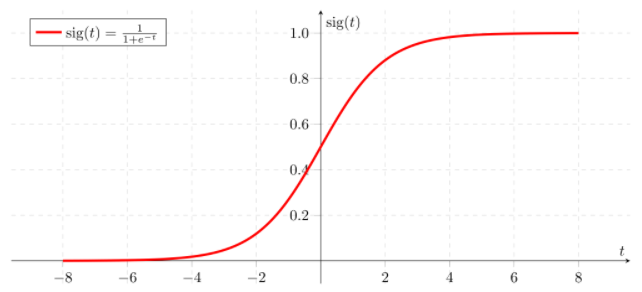



In [5]:
import math
import numpy as np
def logistica1(x):
    s = 1/(1+math.exp(-x))
    print(s) 

logistica1(2)

0.8807970779778823


In [6]:
logistica1([2, 3, 5, 7])

TypeError: bad operand type for unary -: 'list'

**<span class="burk">Ejercicio</span>**: 

Implemente la funcion logistica usando numpy 

**Instrucciones**: 

x ahora podría ser un número real, un vector o una matriz. Las estructuras de datos que usamos en numpy para representar estas formas (vectores, matrices ...) se denominan matrices numpy. 

$$ \text{Para } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [7]:
import numpy as np

def sigmoid(x):
    X = np.array(x)
    s = 1 / (1 + np.exp(-X))
    return s

sigmoid([1, 2, 3, 4, -5, 0.01])

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.00669285,
       0.50249998])

In [8]:
sigmoid(10)

0.9999546021312976

### Gradiente sigmoide

Como se vio en clase, se deberá calcular gradientes para optimizar las funciones de cost. 

**<span class="burk">Ejercicio</span>**: 

Implemente una función para calcular el gradiente de la función sigmoidea con respecto a su entrada x. La formula es: 

$$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$

Codifique esta función en dos pasos:
1. Establezca s para que sea el sigmoide de x. Puede que le resulte útil la función sigmoidea del ejercicio anterior.
2. Calcule $ \sigma '(x) = s (1-s) $

In [9]:
def gradiente(x):
    X = np.array(x)
    s = sigmoid(x)
    a = s*(1-s)
    return a

gradiente([1, 2, 3])

array([0.19661193, 0.10499359, 0.04517666])

In [10]:
gradiente(10)

4.5395807735907655e-05

### Redimensionando arreglos ###

Dos funciones comunmente usadas de Numpy en DeepLearning son [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) y [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape se utiliza para obtener la forma (dimensión) de una matriz / vector X. 
- X.reshape(...) se usa para remodelar X en alguna otra dimensión. 

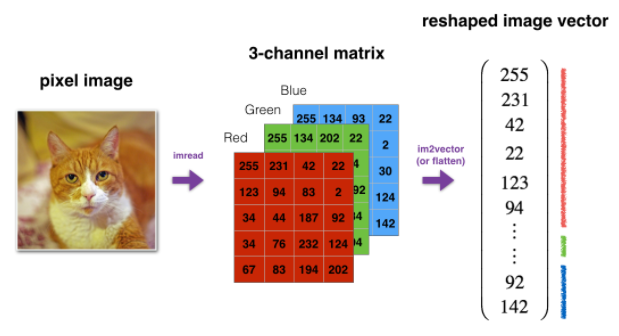 


**<span class="burk">Ejercicio</span>**: 

Cree la funcion `image2vector()` que toma una entrada de forma (longitud, altura, 3) y devuelve un vector de forma (longitud  * altura  * 3, 1). Por ejemplo, si desea remodelar una matriz v de forma (a, b, c) en un vector de forma (a * b, c), debería hacer:

``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- No codifique las dimensiones de la imagen como una constante. En su lugar, busque las cantidades que necesita con `image.shape[0]`, etc.

In [11]:
def image2vector (v):
    v = v.reshape((v.shape[0]*v.shape[1], v.shape[2]))
    return v 

### Normalizando filas

Otra técnica común que usamos en Machine Learning y Deep Learning es normalizar nuestros datos. A menudo conduce a un mejor rendimiento porque el descenso de gradientes converge más rápido después de la normalización. Aquí, por normalización nos referimos a cambiar x por $ \frac {x} {\| x \|} $ (dividiendo cada vector fila de x por su norma).

Por ejemplo, si $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ 

entonces $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$

y   
$$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$

Tenga en cuenta que puede dividir matrices de diferentes tamaños y funciona bien: esto se llama *broadacasting*.

**Ejercicio**: 

Cree la funcion normalizeRows () para normalizar las filas de una matriz. Después de aplicar esta función a una matriz de entrada x, cada fila de x debe ser un vector de longitud unitario (es decir, longitud 1).

In [12]:
def  normalizeRows (x):
    absx= np.linalg.norm(x,axis=1,keepdims=True)
    x_normalized= x/absx
    print (x_normalized)

In [14]:
x=[[0,3,4], 
   [2,6,4]]
normalizeRows (x)

[[0.         0.6        0.8       ]
 [0.26726124 0.80178373 0.53452248]]


### Implementando las regularizacion L1 y L2 

**<span class="burk">Ejercicio</span>**: 

Implemente la versión numpy vectorizada de la regularizacion L1. Puede encontrar útil la función abs (x) (valor absoluto de x).

- La ergularizacion se utiliza para alterar el rendimiento del modelo. Cuanto mayor sea su regularizacion, más diferentes serán sus predicciones ($ \hat {y} $) de los valores reales ($ y $). 
- La regularizacion L1 se define como:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [15]:
def L1 (pred,real):
    l = sum(abs(pred-real))
    print (l)

In [20]:
ypred = np.array([1,2,4])
y = np.array([5,3,2])

L1(ypred,y)


7


**Ejercicio**: 

Implemente la versión numpy vectorizada de la regularizacion L2. Hay varias formas de implementarla, pero la función np.dot () puede resultar útil. Como recordatorio, si 

$ x = [x_1, x_2, ..., x_n] $, entonces `np.dot (x, x)` = $ \sum_ {j = 0} ^ n x_j ^ {2} $.

* La pérdida de L2 se define como $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [18]:
def L2 (pred,real):
    ll = np.dot((pred-real),(pred-real))
    print (ll)

In [19]:
L2(ypred,y)

21
